In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### DATA PREPROCESSING

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Lets drop sepal length and width for simplicity

In [7]:
df.drop(df[['sepal length (cm)','sepal width (cm)']], axis='columns', inplace=True)

df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


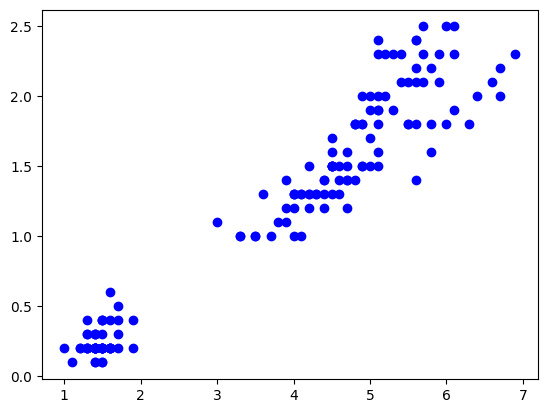

In [8]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='blue')

### K-means clustering

In [9]:
km = KMeans(n_clusters=2)
km.fit_predict(df[['petal length (cm)','petal width (cm)']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster'] = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [11]:
df.cluster.unique()

array([1, 0])

### EDA

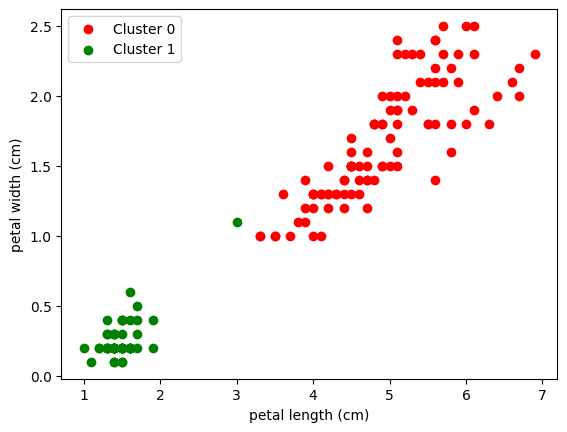

In [12]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='Cluster 0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 1')

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.legend()

### MIN MAX SCALING

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [17]:
y_pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df['cluster2'] = y_pred

df.head()

,petal length (cm),petal width (cm),cluster,cluster2
0,0.067797,0.041667,1,1
1,0.067797,0.041667,1,1
2,0.050847,0.041667,1,1
3,0.084746,0.041667,1,1
4,0.067797,0.041667,1,1


In [33]:
km.cluster_centers_[:,0]

array([0.6620339 , 0.07830508])

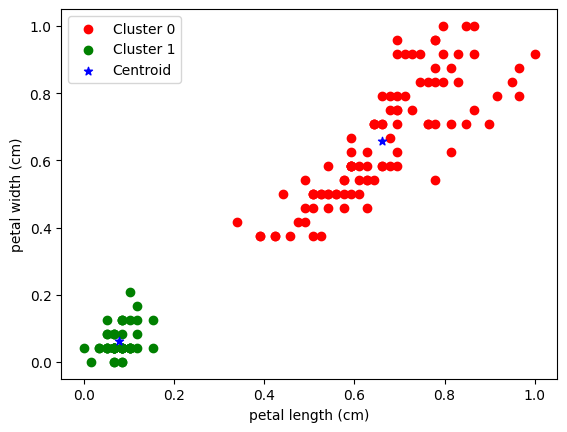

In [32]:
df0 = df[df.cluster2==0]
df1 = df[df.cluster2==1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='Cluster 0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 1')
# lets print the 2 Centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='Centroid')

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.legend()

### Elbow method
- This method is used when we have large dataset and have so many features.
- Elbow method uses something called "SSE" (Sum of Squared Errors).
- SSE will help us find correct **k** value for the data.
- In our case, above we taken **k** as **2** and lets see what **k** value it gives

In [34]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

sse

[28.368353219727194,
 5.176463590044369,
 1.7018746881920963,
 1.1588792731667128,
 0.8535683225340072,
 0.6795297632254397,
 0.5651273455703979,
 0.49325963671630324,
 0.4383980031082156]

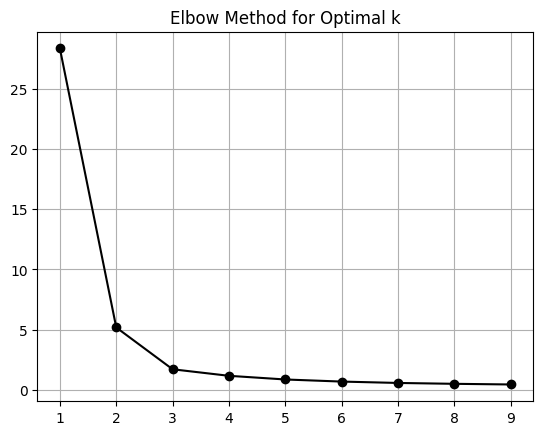

In [41]:
plt.plot(k_range, sse, 'bo-', color='black')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

We are not sure here, if k=2 or k=3. we already tried 2, so lets try 3 once!

In [42]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])

df['cluster3'] = y_pred

df.head()

,petal length (cm),petal width (cm),cluster,cluster2,cluster3
0,0.067797,0.041667,1,1,1
1,0.067797,0.041667,1,1,1
2,0.050847,0.041667,1,1,1
3,0.084746,0.041667,1,1,1
4,0.067797,0.041667,1,1,1


In [44]:
df.cluster3.unique()

array([1, 2, 0])

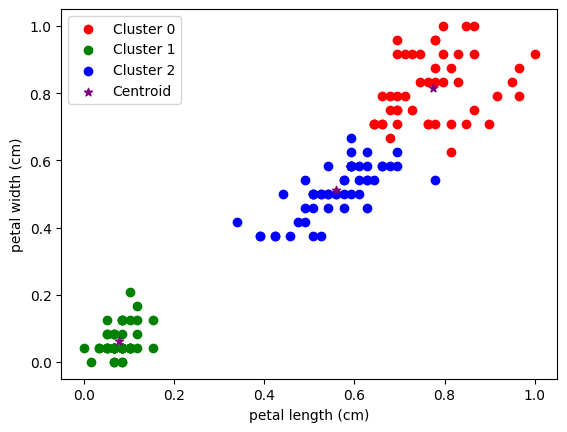

In [47]:
df0 = df[df.cluster3==0]
df1 = df[df.cluster3==1]
df2 = df[df.cluster3==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='Cluster 0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', label='Cluster 2')

# lets print the 2 Centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.legend()